In [1]:
#Borrar entorno
rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, showtext, srvyr,archive)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE) 
library(funcionespgd)
font_add_google("Poppins", "pop")
showtext_auto()

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang    (1.1.4 -> 1.1.6) [CRAN]
glue     (1.7.0 -> 1.8.0) [CRAN]
cli      (3.6.3 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.2 -> 4.0.0) [CRAN]


Installing 6 packages: rlang, glue, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmp0G5Rau\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmp0G5Rau\remotes378011b4651f\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
url_basica<- "https://www.inegi.org.mx/contenidos/programas/enigh/nc/"
segunda_parte<- "microdatos/enigh"
archivos<- c("ns_concentradohogar","ns_gastospersona","ns_gastoshogar")
years<- c("2016","2018","2020","2022","2024")
options(survey.lonely.psu = "certainty")  

In [3]:
# Crear carpeta 'data' si no existe
if(!dir.exists("data")) dir.create("data")  
options(timeout = 600)

In [4]:
for (archivo in archivos) {
  for (i in seq_along(years)) {

    url      <- paste0(url_basica, years[i], "/", segunda_parte, years[i], "_", archivo, "_csv.zip")
    destfile <- paste0("data/", years[i], "_", archivo, ".zip")

    message("Descargando: ", url)
    download.file(url, destfile = destfile, mode = "wb")

    # Descomprimir y capturar rutas extraídas (sin subcarpetas)
    extraidos <- unzip(destfile, exdir = "data", junkpaths = TRUE)

    # Elegir el CSV correcto según el tipo ("concentradohogar" o "gastospersona")
    needle   <- sub("^ns_", "", archivo)
    csv_path <- extraidos[
      grepl("\\.csv$", extraidos, ignore.case = TRUE) &
      grepl(needle, basename(extraidos), ignore.case = TRUE)
    ][1]

    # Renombrar con año para no sobrescribir
    nuevo <- file.path("data", paste0(archivo, "_", years[i], ".csv"))
    if (!is.na(csv_path) && file.exists(csv_path)) {
      file.rename(csv_path, nuevo)
      message("✅ Guardado: ", nuevo)
    } else {
      warning("No se encontró el CSV para ", archivo, " en ", years[i])
    }

    # Borrar zip
    file.remove(destfile)
  }
}

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2016/microdatos/enigh2016_ns_concentradohogar_csv.zip

✅ Guardado: data/ns_concentradohogar_2016.csv

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2018/microdatos/enigh2018_ns_concentradohogar_csv.zip

✅ Guardado: data/ns_concentradohogar_2018.csv

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2020/microdatos/enigh2020_ns_concentradohogar_csv.zip

✅ Guardado: data/ns_concentradohogar_2020.csv

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2022/microdatos/enigh2022_ns_concentradohogar_csv.zip

✅ Guardado: data/ns_concentradohogar_2022.csv

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2024/microdatos/enigh2024_ns_concentradohogar_csv.zip

✅ Guardado: data/ns_concentradohogar_2024.csv

Descargando: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2016/microdatos/enigh2016_ns_gastospersona_csv.zip

✅ Guardado: data/ns_gastospers

In [11]:
years <- c("2016","2018","2020","2022","2024")

estimacion <- function(year, variable) {
  message("Procesando año: ", year)

  conc_path  <- paste0("data/ns_concentradohogar_", year, ".csv")
  gasto_hog_path <- paste0("data/ns_gastoshogar_",  year, ".csv")
  gasto_persona_path <- paste0("data/ns_gastospersona_",  year, ".csv")

  if (!file.exists(conc_path) | !file.exists(gasto_persona_path) | !file.exists(gasto_hog_path)) {
    stop("No se encontraron archivos para el año ", year)
  }

  # ---- Cargar concentrado ----
  hogares <- read_csv(
    conc_path, show_col_types = FALSE
  ) %>%
    mutate(
      folioviv = as.character(folioviv),
      foliohog = as.character(foliohog),
      cve_ent = case_when(
        nchar(folioviv) == 9  ~ paste0("0", substr(folioviv, 1, 1)),
        nchar(folioviv) == 10 ~ substr(folioviv, 1, 2),
        TRUE ~ NA_character_
      )
    )

  # ---- Cargar gasto persona ----

 gasto_persona <- read_csv(gasto_persona_path, show_col_types = FALSE) %>%
    mutate(
      folioviv = as.character(folioviv),
      foliohog = as.character(foliohog)
    ) 

  # ---- Claves según año ----
  claves_transporte <- if (as.integer(year) >= 2024) {
    c("073121","073122","073111","073213","073123","073214","073600")
  } else {
    c("B001","B002","B003")
  }

  # ---- Identificar personas con gasto en TPM y agruparlo a hogar ----
  marca_gasto_tpm <- gasto_persona %>%
    mutate(
      en_tpm = clave %in% claves_transporte,
      gasto_tpm_persona = if_else(en_tpm, coalesce(gasto_tri, 0), 0)
    )

  identifica_transporte <- marca_gasto_tpm %>%
    filter(en_tpm) %>%
    select(folioviv, foliohog, numren,gasto_tpm_persona) %>%
    distinct() %>%
    group_by(folioviv, foliohog) %>%
    summarise(personas_transporte = n(), .groups = "drop",
              gasto_tpm_persona = sum(gasto_tpm_persona, na.rm = TRUE)
              )

###Cargar gastos por hogar y calcular el gasto total en transporte público masivo por hogar
gasto_hogar <- read_csv(gasto_hog_path, show_col_types = FALSE) %>%
    mutate(
      folioviv = as.character(folioviv),
      foliohog = as.character(foliohog)
    )%>%
    select(folioviv, foliohog, clave, gasto_tri)%>%
    filter(clave %in% claves_transporte)%>%
    group_by(folioviv, foliohog)%>%
    summarise(gasto_tpm_hogar = sum(gasto_tri, na.rm = TRUE), .groups = "drop")



  # ---- Unir con hogares ----
  hogares <- hogares %>%
    left_join(identifica_transporte, by = c("folioviv", "foliohog")) %>%
    left_join(gasto_hogar, by = c("folioviv", "foliohog")) %>%
    mutate(
      personas_transporte    = replace_na(personas_transporte, 0),
      gasto_tpm_persona= replace_na(gasto_tpm_persona, 0),
      gasto_tpm_hogar= replace_na(gasto_tpm_hogar, 0),
    # ---- Calcular variables necesarias ----
      porcentaje_transporte_pub = (personas_transporte / tot_integ) * 100,
      mayoria                = if_else(porcentaje_transporte_pub >= 50, 1, 0),
      gasto_tpm_total = gasto_tpm_persona + gasto_tpm_hogar,
      diezpct_tp= if_else((gasto_tpm_total / ing_cor) > 0.10, 1, 0)
    )

  # ---- Diseño muestral ----
  dm <- hogares %>%
    as_survey_design(ids = upm, strata = est_dis, weights = factor, nest = TRUE)

  # ---- Estimación ----
  out <- if (variable == "mayoria_integrantes_tpm") {
    dm %>%
      filter(cve_ent == "09") %>%
      group_by(mayoria) %>%
      summarise(
        hogares    = survey_total(vartype = "cv"),
        porcentaje = survey_prop(vartype = "cv")
      ) %>%
      mutate(porcentaje = round(porcentaje * 100, 2),
             year = year) %>%
      filter(mayoria == 1)
  } else if (variable == "diez_pct_tp") {
    dm %>%
      filter(cve_ent == "09") %>%
      group_by(diezpct_tp) %>%                 # <-- corregido group_by
      summarise(
        hogares_10pct   = survey_total(vartype = "cv"),
        porcentaje_10pct= survey_prop(vartype = "cv")
      ) %>%
      mutate(porcentaje_10pct = round(porcentaje_10pct * 100, 2),
             year = year) %>%
      filter(diezpct_tp == 1)
  } else {
    stop("Variable no reconocida: ", variable)
  }

  out
}


In [12]:
# Correr para todos los años y unir resultados
print("Porcentaje de hogares donde el 50% o más de sus integrantes usa transporte público masivo en CDMX")
resultados_tpm <- map_dfr(
  years,
  ~ estimacion(.x, "mayoria_integrantes_tpm")
)

resultados_tpm

[1] "Porcentaje de hogares donde el 50% o más de sus integrantes usa transporte público masivo en CDMX"


Procesando año: 2016

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2018

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2020

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2022

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data f

mayoria,hogares,hogares_cv,porcentaje,porcentaje_cv,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,952751,0.04865426,33.72,0.04576295,2016
1,1055858,0.04175916,38.00,0.03928990,2018
1,575891,0.05635989,21.08,0.05600269,2020
1,936601,0.04421366,31.32,0.04290188,2022
1,1106788,0.04059472,35.91,0.03874498,2024


In [14]:
print("Porcentaje de hogares que destinan más del 10% de su ingreso a transporte público masivo en CDMX")
resultados_10pct <- map_dfr(
  years,
  ~ estimacion(.x, "diez_pct_tp")
)
resultados_10pct

[1] "Porcentaje de hogares que destinan más del 10% de su ingreso a transporte público masivo en CDMX"


Procesando año: 2016

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2018

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2020

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Procesando año: 2022

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data f

diezpct_tp,hogares_10pct,hogares_10pct_cv,porcentaje_10pct,porcentaje_10pct_cv,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,3588,0.7222288,0.13,0.7225141,2016
1,1482,1.0000000,0.05,1.0004186,2018
1,2502,0.7032656,0.09,0.7024570,2020
1,3635,0.5786848,0.12,0.5801827,2022
1,4432,0.5756237,0.14,0.5766230,2024


In [15]:
  # Lista de URLs por clave compuesta "anio_ent"
  urls_censo_int <- list(
    "2015" = "https://www.inegi.org.mx/contenidos/programas/intercensal/2015/microdatos/eic2015_09_csv.zip",
    "2020" = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CA_cdmx_csv.zip"
  )

In [16]:
#Datos deL Censo ====
leer_censo <- function(anio_ent) {  
  url <- urls_censo_int[[anio_ent]]
  nombre_zip <- paste0(anio_ent, ".zip")
  temp_dir <- tempdir()
  zip_path <- file.path(temp_dir, nombre_zip)
  
  options(timeout = 8000)
  download.file(url, destfile = zip_path, mode = "wb")
  
  unzip(zip_path, exdir = temp_dir)
  
  datos_csv <- list.files(temp_dir, pattern = "\\.CSV$", full.names = TRUE, recursive = TRUE)
  archivo_personas <- datos_csv[grepl("PER|PERS|PERSONA|TR_PERSONA", datos_csv, ignore.case = TRUE)]

  if (length(archivo_personas) == 0) {
    warning(glue::glue("No se encontró archivo esperado para el año {anio_ent}. Se usará el primer CSV disponible."))
    archivo_personas <- datos_csv[1]
  } else {
    archivo_personas <- archivo_personas[1]
  }

  
  datos <- readr::read_csv(archivo_personas, col_types = NULL)%>%
  janitor::clean_names() %>%
   select(ent, mun, factor, upm, estrato, 
   asisten, conact, ent_pais_asi, mun_asi, ent_pais_trab, mun_trab, tie_traslado_escu, tie_traslado_trab)
  
  unlink(zip_path)
  unlink(list.files(temp_dir, full.names = TRUE), recursive = TRUE)
  
  return(datos)
}

In [17]:
#Leer datos de censo e intercensal

datos_censo_int <- imap_dfr(urls_censo_int, ~ leer_censo(.y) %>% mutate(anio = .y))

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 553032 Columns: 86
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): ENT, NOM_ENT, MUN, NOM_MUN, LOC50K, NOM_LOC, ESTRATO, UPM, ENT_PAI...
dbl (65): ID_VIV, ID_PERSONA, COBERTURA, FACTOR, NUMPER, SEXO, EDAD, PARENT,...
lgl  (1): EDAD_MORIR_D

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 276007 Columns: 91
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): ENT, MUN, LOC50K, ID_VIV, ID_PERSONA, ESTRATO, UPM, CLAVIVP, NUMPE...
dbl (57): COBERTURA, FACTOR, SEXO, EDAD, PARENTESCO, NACIONALIDAD, AFRODES, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_type

In [18]:
##Calcular tiempos de trabajo al trabajo
tiempos<-list()


for (anio in c("2015", "2020")) {
  datos_anio <- datos_censo_int %>% filter(anio == !!anio)
  
  dm <- datos_anio %>%
    as_survey_design(ids = upm, 
                     weights = factor, 
                     nest = TRUE,
                     strata= estrato)
  
  
  dm %>%
    filter(ent_pais_trab == "009") %>% # Filtrar solo los que trabajan en CDMX
    mutate(tiempo_trabajo=
    case_when(tie_traslado_trab %in% c(4,5) ~ "Más de una hora",
    TRUE ~ "Menos de una hora, no se traslada o no especificado"))%>%
    group_by(tiempo_trabajo) %>%
    summarise(personas = survey_total(vartype = "cv"),
              porcentaje = survey_prop(vartype = "cv") * 100) %>%
              ungroup() %>%
    mutate(year = anio)%>%
    filter(tiempo_trabajo == "Más de una hora")-> resultado
  
  # Almacenar resultados en la lista
  tiempos[[as.character(anio)]] <- resultado
}

# Unir resultados en un solo data frame
tiempos_trabajo <- bind_rows(tiempos, .id = "year") %>%
  mutate(tipo = "Observado")
tiempos_trabajo

tiempo_trabajo,personas,personas_cv,porcentaje,porcentaje_cv,year,tipo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Más de una hora,662806,0.01925339,17.54626,1.306145,2015,Observado
Más de una hora,744508,0.02986547,17.80950,2.058150,2020,Observado


#### Proyecciones

In [35]:
tcma_hogares_uso_tp<-((resultados_tpm$porcentaje[resultados_tpm$year==2024]/resultados_tpm$porcentaje[resultados_tpm$year==2022])^(1/(10))-1)

tcma_hogares_uso_tp 

[1] 0.01376984

In [36]:
extendido_uso_tp<-data.frame(year=2025:2045)
extendido_uso_tp$porcentaje<-resultados_tpm$porcentaje[resultados_tpm$year==2024]*cumprod(rep(1+tcma_hogares_uso_tp,length(2025:2045)))
extendido_uso_tp%>%
mutate(porcentaje=round(porcentaje,2))

year,porcentaje
<int>,<dbl>
2025,36.40
2026,36.91
2027,37.41
2028,37.93
2029,38.45
2030,38.98
2031,39.52
2032,40.06
2033,40.61


In [37]:
  serie_completa_uso_tp <- bind_rows(
    resultados_tpm %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "porcentaje"),

    extendido_uso_tp %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.0004, año_base = 2024,var="porcentaje"))
serie_completa_uso_tp

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2016,33.72000,33.72000,33.72000
2018,38.00000,38.00000,38.00000
2020,21.08000,21.08000,21.08000
2022,31.32000,31.32000,31.32000
2024,35.91000,35.91000,35.91000
2025,36.40447,36.41904,36.38992
2026,36.90576,36.93529,36.87625
2027,37.41394,37.45886,37.36908
2028,37.92913,37.98985,37.86850


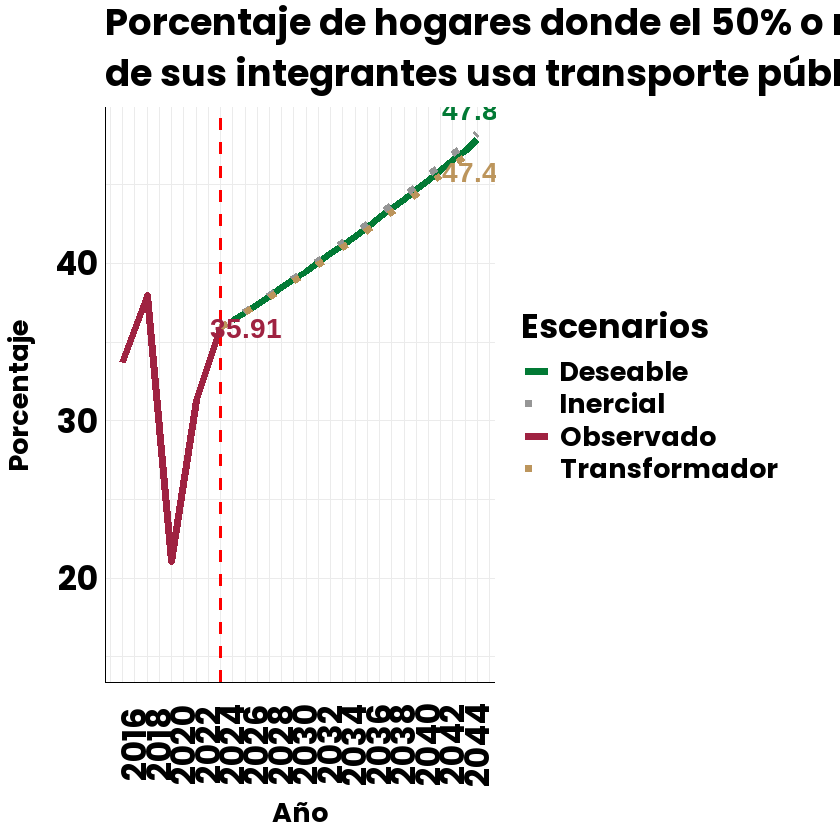

In [40]:
grafica_bonita(
  data = serie_completa_uso_tp,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de hogares donde el 50% o más
de sus integrantes usa transporte público masivo en CDMX",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
  desplazamiento_ano_base=c(2, 0),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 15
)

ggsave("H:/Mi unidad/pgd/graficas/Línea 17. De Movilidad Sustentable, Articulada y Accesible/uso_transporte_publico.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")


In [44]:
tcma_hogares_ingreso_tp<-((resultados_10pct$porcentaje_10pct[resultados_10pct$year==2024]/resultados_10pct$porcentaje_10pct[resultados_10pct$year==2020])^(1/(2024-2020))-1)*-1

tcma_hogares_ingreso_tp 

[1] -0.1167897

In [45]:
extendido_hogares_ingreso_tp<-data.frame(year=2025:2045)
extendido_hogares_ingreso_tp$porcentaje_10pct<-resultados_10pct$porcentaje_10pct[resultados_10pct$year==2024]*cumprod(rep(1+tcma_hogares_ingreso_tp,length(2025:2045)))
extendido_hogares_ingreso_tp%>%
mutate(porcentaje_10pct=round(porcentaje_10pct,2))

year,porcentaje_10pct
<int>,<dbl>
2025,0.12
2026,0.11
2027,0.10
2028,0.09
2029,0.08
2030,0.07
2031,0.06
2032,0.05
2033,0.05


In [48]:
  serie_completa_ingreso_tp <- bind_rows(
    resultados_10pct %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "porcentaje_10pct"),

    extendido_hogares_ingreso_tp %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.04, año_base = 2024,var="porcentaje_10pct"))
serie_completa_ingreso_tp

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2016,0.13000000,0.13000000,0.130000000
2018,0.05000000,0.05000000,0.050000000
2020,0.09000000,0.09000000,0.090000000
2022,0.12000000,0.12000000,0.120000000
2024,0.14000000,0.14000000,0.140000000
2025,0.12364945,0.12859543,0.118893701
2026,0.10920847,0.11811988,0.100969372
2027,0.09645405,0.10849769,0.085747302
2028,0.08518922,0.09965934,0.072820100


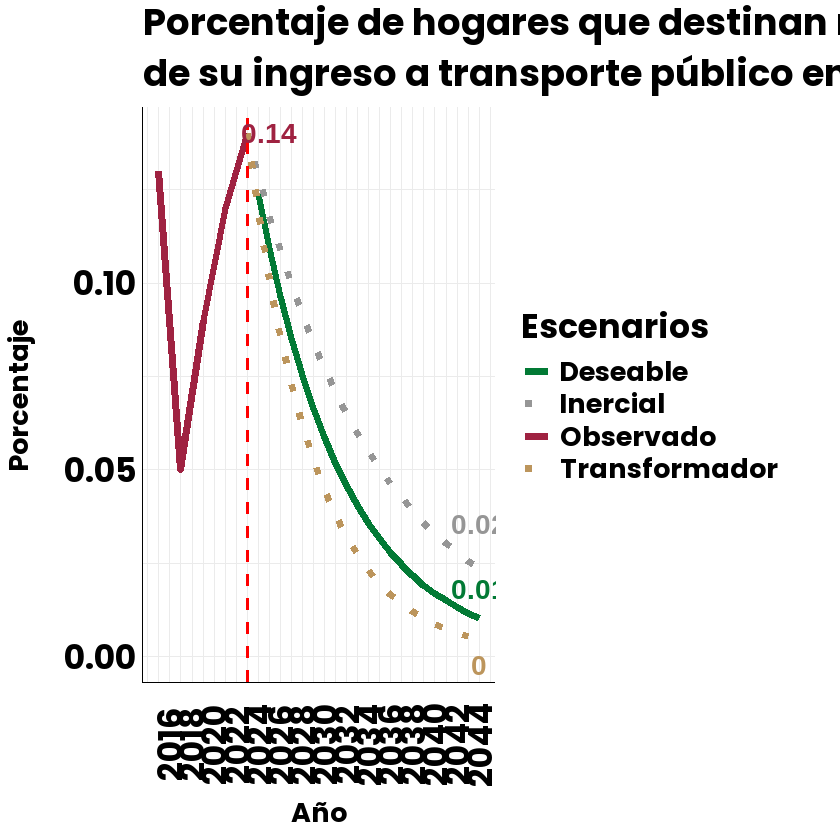

In [49]:
grafica_bonita(
  data = serie_completa_ingreso_tp,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de hogares que destinan más del 10% 
de su ingreso a transporte público en CDMX",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
  desplazamiento_ano_base=c(2, 0),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/Línea 17. De Movilidad Sustentable, Articulada y Accesible/10pct_transporte_publico.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")

In [27]:
#Se ocupa la tasa de crecimiento promedio anual pero se multiplicado por -1 para reflejar la disminución

tcma_tiempo_traslado<-((tiempos_trabajo$porcentaje[tiempos_trabajo$year==2020]/tiempos_trabajo$porcentaje[tiempos_trabajo$year==2015])^(1/(2020-2015))-1)*-1
tcma_tiempo_traslado


[1] -0.002982766

In [28]:
extendido_tiempo_traslado<-data.frame(year=2021:2045)

extendido_tiempo_traslado$porcentaje<-tiempos_trabajo$porcentaje[tiempos_trabajo$year==2020]*cumprod(rep(1+tcma_tiempo_traslado,length(2021:2045)))
extendido_tiempo_traslado%>%
mutate(porcentaje=round(porcentaje,2))


year,porcentaje
<int>,<dbl>
2021,17.76
2022,17.70
2023,17.65
2024,17.60
2025,17.55
2026,17.49
2027,17.44
2028,17.39
2029,17.34


In [29]:
serie_completa_tiempo_traslado <- bind_rows(
    tiempos_trabajo %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2020,var = "porcentaje"),

    extendido_tiempo_traslado %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2020,var="porcentaje"))
serie_completa_tiempo_traslado

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2015,17.54626,17.54626,17.54626
2020,17.80950,17.80950,17.80950
2021,17.75638,17.82741,17.68564
2022,17.70342,17.84533,17.56264
2023,17.65061,17.86327,17.44049
2024,17.59797,17.88123,17.31919
2025,17.54548,17.89920,17.19874
2026,17.49314,17.91720,17.07912
2027,17.44096,17.93521,16.96034


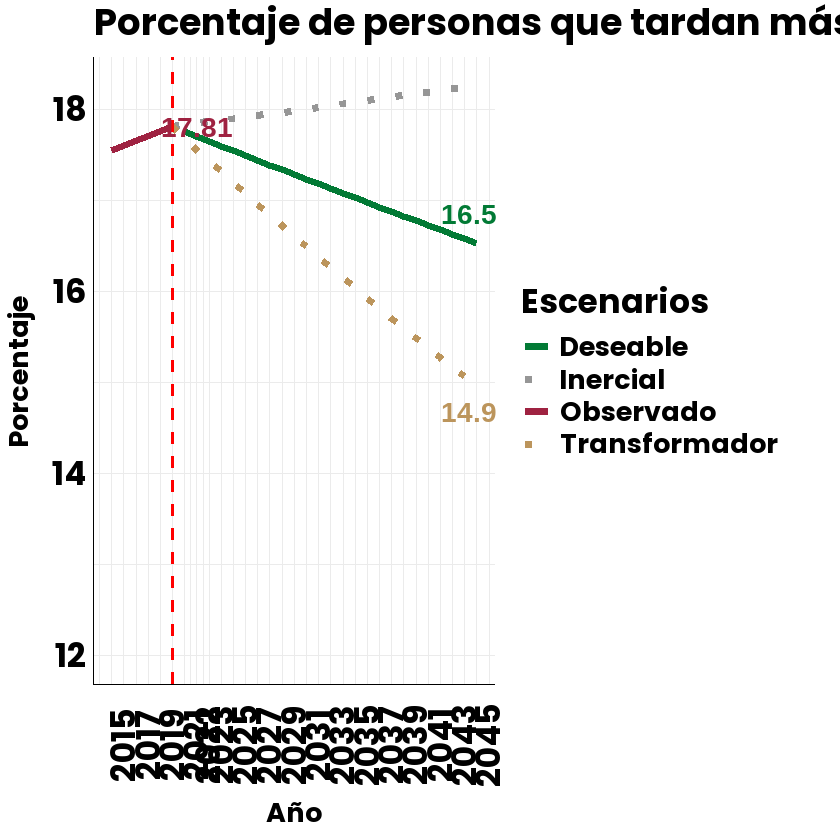

In [30]:
grafica_bonita(
  data = serie_completa_tiempo_traslado,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de personas que tardan más de una hora en trasladarse al trabajo en CDMX",
    ano_base = 2020,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2020,
  anios_etiquetas = c(2045),
  desplazamiento_ano_base=c(2, 0),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 12
)
ggsave("H:/Mi unidad/pgd/graficas/Línea 17. De Movilidad Sustentable, Articulada y Accesible/tiempo_traslado_trabajo.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")